# 개요

- SQL 단독으로 분석 행위를 모두 수행하는것은 한계가 존재함
    - 시각화 X
    - 예측 모델 X
    - SQL 레벨에서 최대치로 할수 있는 부분만 구성, 일반적인 데이터 분석의 보조도구, 시너지를 내는 도구로 활용

# 플로우

- 분석 계획 수립
    - 질의
        - 신규 고객이 얼마나 유입되었는가?
        - 판매 추이는?
        - 1회성 고객은?
        - ..
    - 이를 분석하기 위해서 어디서 데이터를 가져오고, 저장되고 등등 체크
    - 타겟 설정

- 데이터 생성
    - 자원 시스템을 통해서 생성
    - ex) 고객이 로그인 클릭, 구매, ... 이런 모든 행위들

- 생성된 데이터를 데이터베이스에 저장
    - 데이터 웨어 하우스
        - 여러 조직의 데이터를 하나의 중앙 저장소에 통합한 데이터베이스
    - 데이터 스토어
        - **쿼리**를 보낼수 있는 모든 종류의 데이터 저장 시스템
    - 데이터 마트
        - 데이터 웨어 하우스 서브셋, 좁은 의미
    - 데이터 레이크
        - 데이터 자체를 형태 변환을 하지 않고 그대로 저장한 데이터베이스

- 쿼리 및 분석 => 데이터 파악(통찰을 얻는 과정)
    - 탐색(exploring)
        - 테이블 구조, 컬럼에 대한 이해
        - 데이터에 대한 이해, 특징 파악
        - 어디서 데이터가 생성
        - 데이터를 이해하는 과정
    - 프로파일링(profiling)
        - 데이터 분포 ( 시각화(히스토그램, 빈도)를 위해서 데이터 준비
        - 구간화(n분위수, 버킷단위로 그룹화)
        - 중복탐지
        - 이상값 탐지
    - 정제(cleaning)
        - 결측치 처리
        - 틀린 데이터, 부정확한 데이터 수정
        - 연속형 데이터 -> 구간화 -> 범주형데이터로 구성 : CASE 변환
    - 세이핑(shaping)
        - 행과 열의 변환 처리 -> 피벗
    - 분석(analyzing)
        - 트랜드 파악, 결론을 내린다
        - 인사이트를 찾기 위해 데이터를 검토하는 과정
    
    - 이 과정은 계속해서 원하는 결과 수준에 도달할때까지 반복된다(거슬러 올라갈수도 있다) -> 에자일 방법론과 가장 유사함

- 발표, 레포트
    - 데이터 최종 가공후 발표
    - 시각화 도구를 적절하게 활용해서 분석 결과로 나온 인사이트를 제공
        - 시각화 도구
        - 통계/머신러닝 알고리즘 동원해서 확장 -> 모델 구축이라는 단계가 추가

# 데이터베이스

- 행기반 데이터베이스 (RDS)
    - 오픈소스 기반
        - MySql, Postgress, ...
    - 상용 데이터베이스
        - MSSQL, Oracle, AWS Aurora,...
- 열기반 데이터베이스
    - 2000년 이후 등장
    - 아마존 레드시프트, 스노우 플레이크, 버티카,...
    - 모든 데이터 필요 없이 필요한 열만 가져와서 처리

# 데이터 인프라스트럭처

- SQL의 한계 극복을 위해 등장
- 빅데이터 처리등 (모바일->데이터 폭주 -> 빅데이터 처리하는 방법론  RDS의 한계)
- 2010 전후
    - **하둡(HDFS)**
        - 대량의 비정형 데이터 저장
        - SQL 비호환
    - **nosql**
        - key-value
            - **Redis**, MemCached, Riak, AWS Dynamo DB, Level DB
        - Document
            - **MongoDB**, CouchDBm, MarkLogic
        - Column-Family
            - **Cassandra, HBase**, Hypertale
        - Graph
            - sns
    - 검색 기반 데이터 스토어
        - 엘라스틱 서치
        - 스플렁크

# 정량/정성 데이터

- 정량 데이터
    - 사람, 물건, 이벤트등등 수치로 정량화 한 데이터
    - ex)
        - 고객 정보, 가격, 양, 방문기간
        - 의료 키, 몸무게, 혈압
- 정성 데이터
    - 텍스트로 기록된 느낌, 의견, 서술 수치화 할수 없는 데이터
    - ex)
        - 온도, 습도 => 정량
        - 덥다, 춥다, 습하다 => 정성
    - 수치화해서 분석
        - NLP(자연어처리)을 활용
        - 빈도, 중요도, 언어구조, 등등...

# SQL을 이용한 데이터 분석 + 시각화

- car_xxx 데이터를 이용하여 아래 명제들을 분석
- 구조는 ERD를 통해서 확인

## ERD (Entity-Relationship Diagram)

- 데이터를 구조화 하기 위한 개체-관계 모델링 기법

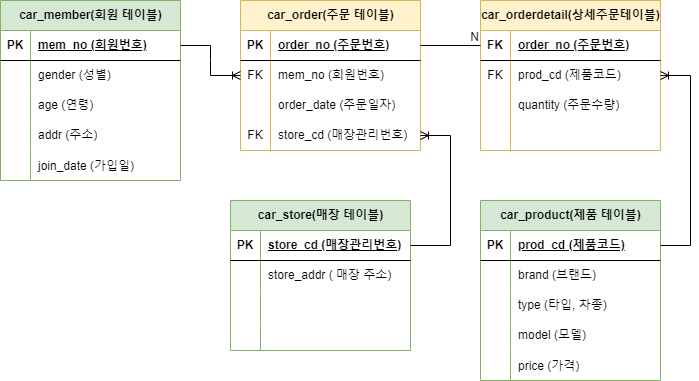

## DB 연동 모듈

In [ ]:
# 필요 패키지 설치
!pip install -q pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.1 MB/s eta 0:00:00


In [ ]:
# 필요 패키지
import pymysql # python에서 sql
import pandas as pd  # 분석, 시각화
import seaborn as sns # 시각화
import numpy as np # 분석
import matplotlib.pyplot as plt # 시각화
import warnings # 경고 무시
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
# 접속 정보
# 접속정보
HOST = 'aws endpoint'
ID = 'aws등록ID'
PW = 'DB PW'
PORT = '지정포트'
DBNAME = 'cars'
PROTOCAL = 'mysql+pymysql'

In [ ]:
# 접속 정보
# 접속정보
#HOST = 'aws endpoint'
#ID = 'AWS 개인 지정 ID'
#PW = 'AWS 개인지정 PW'
#PORT = 3306
#DBNAME = '사용할 DB명'
#PROTOCAL = 'mysql+pymysql'

In [ ]:
# 데이터베이스 연동 모듈 함수

# DB 연결을 위한 모듈
def get_conn():
    '''
        데이터베이스 연결
        returns
            db 커넥션 객체
    '''
    return pymysql.connect(   host    = HOST,
                                    user    = ID,
                                    password= PW,
                                    database= DBNAME,
                                    # select의 결과 집합은 [ {}, {}, {}, ...] 형태로 나옴, 지정
                                    cursorclass=pymysql.cursors.DictCursor
                                    )

# DB와 연결 중단하는 모듈
def close_conn( conn ):
    '''
        데이터베이스 연결 종료
        parameters
            - conn : 커넥션 객체
    '''
    if conn:
        conn.close()
    pass

# DB의 쿼리문을 실행 (실제 sql에 작성하듯 쿼리를 작성하여 함수에 대입)
def get_sql( sql : str ):
    '''
        DQL  계열의 select 쿼리 수행
        parameters
            - sql : select 문
        returns
            - 결과 집합, DataFrame으로 리턴
    '''
    # 쿼리를 요청할대마다 => 접속 => 쿼리 => 닫기 반복
    conn = None
    results = pd.DataFrame() # 비어있는 데이터프레임 자료구조
    try:
        conn    = get_conn()
        results = pd.read_sql(sql, conn)
    except Exception as e:
        pass
    finally:
        close_conn( conn )
    return results

# create view 등 DDL 계열의 명령어를 수행하는 모듈
def exec_sql( sql : str ):
    '''
        DDL  계열의 create view 쿼리 수행
        parameters
            - sql : create view ~
        returns
            - None, 성공여부
    '''
    conn = None
    try:
        conn    = get_conn()
        with conn:
            with conn.cursor() as cursor:
                cursor.execute( sql )
    except Exception as e:
        print( e )
        pass
    pass

In [ ]:
conn = get_conn()
close_conn(conn)

## 데이터 마트 구성 - View 생성

- n개의 테이블을 join 해서 가상 테이블 생성
    - view는 필요에 의해 계속 생성

- 데이터 마트를 구성하시오
    - 5개 테이블을 join 하여서 view를 생성
    - 이름 : car_mart
    - 컬럼
        - car_order는 전부 포함
        - car_orderdetail
            - prod_cd (제품코드)
            - quantity (주문수량)
        - 새로 생성 -> sales_amt
            - quantity (주문수량) * 가격 : 판매가
        - car_product(제품 테이블)
            - price (가격)
            - brand
            - model
        - car_store(매장 테이블)
            - store_addr ( 매장 주소)
        - car_member(회원 테이블)
            - gender (성별)
            - age (연령)
            - addr (주소)
            - join_date (가입일)

```
    SELECT CAST(replace(price,',','') AS UNSIGNED) FROM car_product LIMIT 1;


    -- car_mart 생성
    CREATE VIEW car_mart AS SELECT A.*
        ,B.prod_cd
        ,B.quantity
        ,C.price
        ,B.quantity * CAST(REPLACE(C.price,',','') AS UNSIGNED)  AS sales_amt
        ,C.brand
        ,C.model
        ,D.store_addr
        ,E.gender
        ,E.age
        ,E.addr
        ,E.join_date
    FROM car_order AS A
    LEFT JOIN car_orderdetail AS B ON A.order_no = B.order_no
    LEFT JOIN car_product     AS C ON B.prod_cd  = C.prod_cd
    LEFT JOIN car_store       AS D ON A.store_cd = D.store_cd
    LEFT JOIN car_member      AS E ON A.mem_no   = E.mem_nocar_martcar_mart
```

In [ ]:
sql_create_car_mart = '''
    -- car_mart 생성
    CREATE VIEW car_mart AS SELECT A.*
        ,B.prod_cd
        ,B.quantity
        ,C.price
        ,B.quantity * CAST(REPLACE(C.price,',','') AS UNSIGNED)  AS sales_amt
        ,C.brand
        ,C.model
        ,D.store_addr
        ,E.gender
        ,E.age
        ,E.addr
        ,E.join_date
    FROM car_order AS A
    LEFT JOIN car_orderdetail AS B ON A.order_no = B.order_no
    LEFT JOIN car_product     AS C ON B.prod_cd  = C.prod_cd
    LEFT JOIN car_store       AS D ON A.store_cd = D.store_cd
    LEFT JOIN car_member      AS E ON A.mem_no   = E.mem_no
'''

# 데이터마트 생성
exec_sql( sql_create_car_mart )

(1050, "Table 'car_mart' already exists")


In [ ]:
df = get_sql( 'select * from car_mart' )
df.head(2)

,order_no,mem_no,order_date,store_cd,prod_cd,quantity,price,sales_amt,brand,model,store_addr,gender,age,addr,join_date
0,2000001,1001582,2020-01-11,2003,1001,2,"29,900,000\r",59800000,honda,accord mini,incheon\r,man,31,Seoul,2020-01-10
1,2000003,1001583,2020-01-13,2003,1002,1,"39,900,000\r",39900000,honda,accord deluxe,incheon\r,man,30,Seoul,2020-01-10


In [ ]:
df.describe()

,order_no,mem_no,store_cd,prod_cd,quantity,sales_amt,age
count,4.176000e+03,4.176000e+03,4176.000000,4176.000000,4176.000000,4.176000e+03,4176.000000
mean,2.004632e+06,1.002072e+06,2009.987548,1024.475335,1.033525,2.759065e+08,48.378113
std,1.907973e+03,1.146886e+03,4.135008,13.944213,0.229191,5.145643e+08,12.213352
min,2.000001e+06,1.000001e+06,2001.000000,1001.000000,1.000000,1.029000e+07,20.000000
25%,2.003753e+06,1.001137e+06,2008.000000,1013.000000,1.000000,4.860000e+07,40.000000
50%,2.004992e+06,1.002032e+06,2011.000000,1023.000000,1.000000,6.990000e+07,50.000000
75%,2.006157e+06,1.003052e+06,2013.000000,1037.000000,1.000000,1.405000e+08,59.000000
max,2.007199e+06,1.004094e+06,2015.000000,1048.000000,5.000000,5.395200e+09,69.000000


## 구매 고객 프로파일링 분석

- 고객 성별.연력.지역 정보를 활용, 구매자의 특징 및 특성 파악
- 연속형 데이터 => 범주형으로 컬럼 추가
    - ~ < 20            => '20대 미만'
    - 20 <= age < 29    => '20대'
    - 30 <= age < 39    => '30대'
    - 40 <= age < 49    => '40대'
    - 50 <= age < 59    => '50대'
    - 60 <=             => '60대 이상'
    - SQL
        ```
            컬럼 1개를 표현
            CASE WHEN 조건식 THEN '20대 미만'
                 WHEN 조건식 THEN '20대'
                 ....
                 ELSE '60대 이상' END AS age_band
        ```
- view 생성 profile_base
    - 컬럼
        - car_mart 모든 컬럼
        - 신규컬럼명 : age_band (20대, ...)


In [ ]:
sql_create_user_profile_base = '''
    create view user_profile_base as
    SELECT *
           , CASE WHEN age < 20 THEN '20대 미만'
                  WHEN age BETWEEN 20 AND 29 THEN '20대'
                  WHEN age BETWEEN 30 AND 39 THEN '30대'
                  WHEN age BETWEEN 40 AND 49 THEN '40대'
                  WHEN age BETWEEN 50 AND 59 THEN '50대'
                  ELSE '60대 이상' END
              AS age_band
    FROM car_mart;
'''

# user_profile_base view 생성
exec_sql(sql_create_user_profile_base)

(1050, "Table 'user_profile_base' already exists")


In [ ]:
# df로 전체 데이터 user_profile_base 로드하기
df = get_sql('select * from user_profile_base;')
df.shape

(4176, 16)

In [ ]:
df.head(2)

,order_no,mem_no,order_date,store_cd,prod_cd,quantity,price,sales_amt,brand,model,store_addr,gender,age,addr,join_date,age_band
0,2000001,1001582,2020-01-11,2003,1001,2,"29,900,000\r",59800000,honda,accord mini,incheon\r,man,31,Seoul,2020-01-10,30대
1,2000003,1001583,2020-01-13,2003,1002,1,"39,900,000\r",39900000,honda,accord deluxe,incheon\r,man,30,Seoul,2020-01-10,30대


In [ ]:
# user_profile_base 고찰
# 유저 1명은 주문을 여러번 할 수 있음 => 회원번호(mem_no) => 중복 검사
len(df.mem_no.unique()) == df.shape[0] # 확인
print(len(df.mem_no.unique()))

3977


In [ ]:
# age_band를 그룹화 하여서 그룹별 카운트를 출력하시오
# 구매자의 연령대별 분포 -> 데이터 추출 -> 시각화
count_age_group = get_sql('SELECT age_band ,COUNT(DISTINCT mem_no) as mem_count FROM user_profile_base GROUP BY age_band;')
count_age_group

,age_band,mem_count
0,20대,288
1,30대,521
2,40대,633
3,50대,1558
4,60대 이상,977


In [ ]:
sum(count_age_group.mem_count) # 3977명 맞네!

3977

([<matplotlib.patches.Wedge at 0x7e2717c9e230>,
 [Text(1.0716559268250578, 0.24809992845772155, '20대'),
  Text(0.7121934001618323, 0.8383200825257192, '30대'),
  Text(-0.22646423789695896, 1.076435761647554, '40대'),
  Text(-1.0266215303377102, -0.39502940833190886, '50대'),
  Text(0.7883438373952908, -0.7671466574527113, '60대 이상')])

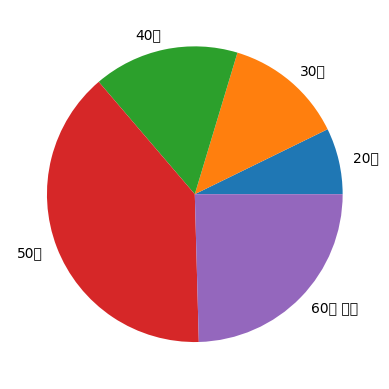

In [ ]:
plt.pie(count_age_group.mem_count, labels = count_age_group.age_band)

<Axes: xlabel='age_band', ylabel='mem_count'>

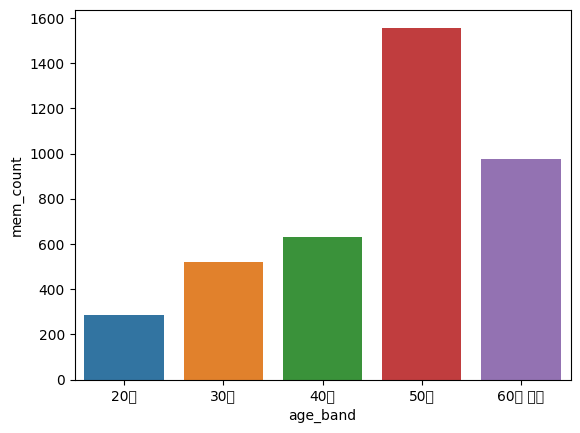

In [ ]:
# 바차트
sns.barplot(data = count_age_group,  x= 'age_band', y = 'mem_count')

- 구매자의 성별 분포 -> 파이, 바차트


,gender,mem_count
0,man,2240
1,women,1737


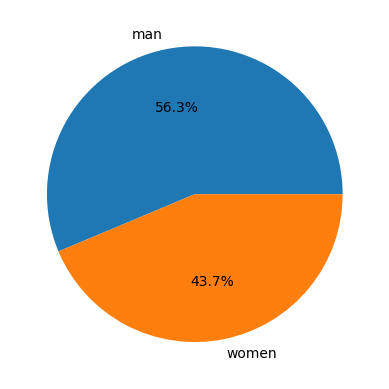

In [ ]:
# 구매자의 성별 분포 -> 파이차트, 바차트
cur_sql = '''
    SELECT gender
           ,COUNT(DISTINCT mem_no) as mem_count
    FROM user_profile_base
    GROUP BY gender
'''
df = get_sql( cur_sql )
display(df) # DF를 출력하는 함수
plt.pie( df.mem_count, labels=df.gender, autopct='%.1f%%')
plt.show()

- 연령대별 성별 구매자 분포 -> 바차트


,age_band,gender,gender_count
0,20대,man,151
1,20대,women,149
2,30대,man,321
3,30대,women,242
4,40대,man,399
5,40대,women,264
6,50대,man,946
7,50대,women,710
8,60대 이상,man,544
9,60대 이상,women,450


<Axes: xlabel='age_band', ylabel='gender_count'>

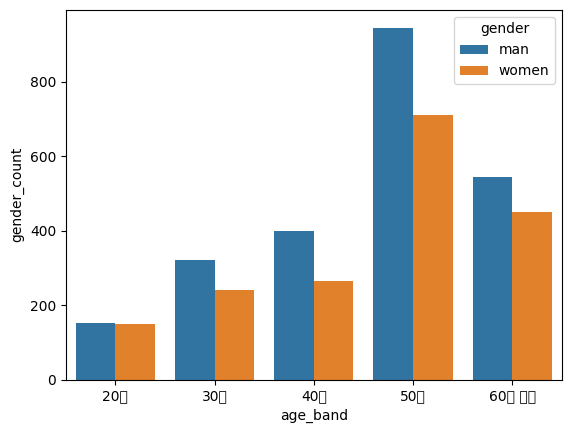

In [ ]:
cur_sql = 'SELECT age_band, gender ,COUNT(*) AS gender_count FROM user_profile_base GROUP BY age_band, gender;'
df = get_sql( cur_sql )
display(df) # DF를 출력하는 함수
sns.barplot(data = df,  x= 'age_band', y = 'gender_count', hue= 'gender')

- 연령대별 성별 구매자, 구매년도(20,21년도) 분포 -> 라인차트(년도별)
- 칼럼 : 연령대, 성별, 2020구매자수(연령대, 성별), 2021구매자수(연령대, 성별)


,gender,age_band,mem_count20,mem_count21
0,man,20대,60,91
1,man,30대,115,206
2,man,40대,198,201
3,man,50대,317,629
4,man,60대 이상,220,324
5,women,20대,57,92
6,women,30대,94,148
7,women,40대,130,134
8,women,50대,240,470
9,women,60대 이상,181,269


<Axes: xlabel='age_band', ylabel='mem_count20'>

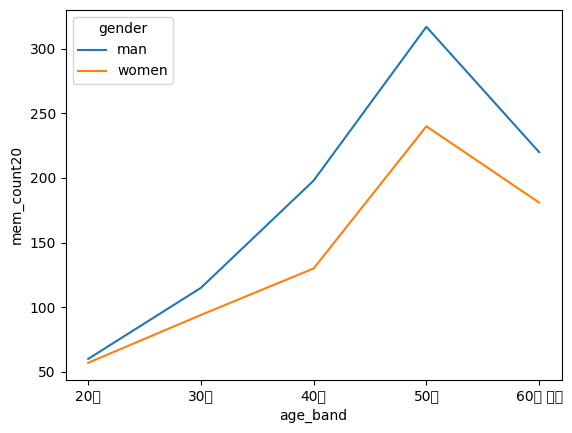

In [ ]:
cur_sql = '''
SELECT gender, age_band,
COUNT(case when YEAR(order_date)=2020 then mem_no end) AS mem_count20,
COUNT(case when YEAR(order_date)=2021 then mem_no end) AS mem_count21
FROM user_profile_base
GROUP BY gender, age_band;
'''
df = get_sql( cur_sql )
display(df) # DF를 출력하는 함수
sns.lineplot(data = df,  x= 'age_band', y = 'mem_count20', hue= 'gender')

<Axes: xlabel='age_band', ylabel='mem_count21'>

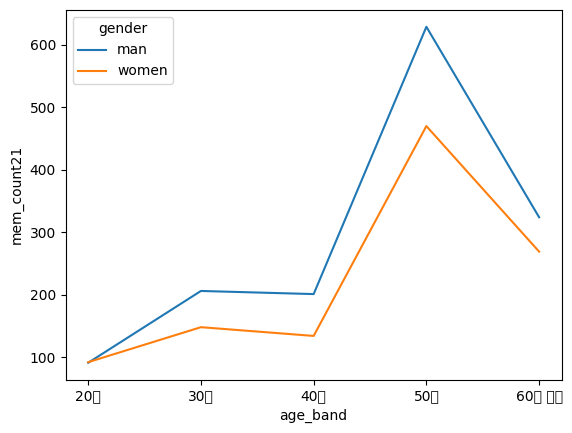

In [ ]:
sns.lineplot(data = df,  x= 'age_band', y = 'mem_count21', hue= 'gender')

In [ ]:
# 피벗
df.pivot_table(index = ['gender', 'age_band'])

mem_count20  mem_count21
gender age_band                          
man    20대                60           91
       30대               115          206
       40대               198          201
       50대               317          629
       60대 이상            220          324
women  20대                57           92
       30대                94          148
       40대               130          134
       50대               240          470
       60대 이상            181          269

- 특정회원에 대한 년도별 구매값


In [ ]:
'''
SELECT mem_no, SUM(sales_amt) AS pay_amt
FROM user_profile_base
GROUP BY mem_no
ORDER BY pay_amt desc;
'''

'\nSELECT mem_no, SUM(sales_amt) AS pay_amt\nFROM user_profile_base\nGROUP BY mem_no\nORDER BY pay_amt desc;\n'

- 특정회원에 대한 년도별 구매건수

In [ ]:
cur_sql = '''
SELECT mem_no, count(*) AS buy_amt
FROM user_profile_base
GROUP BY mem_no
ORDER BY buy_amt DESC;
'''

## RFM  고객 세분화 분석

- R(Recency):최근성/F(Frequency):구매빈도/M(Menetary):구매금액
- 구매지표를 계산 -> 고객별 등급
    - VVIP : 구매금액 20억이상, 구매빈도 3회이상
    - VIP  : 구매금액 10억이상, 구매빈도 2회이상
    - GOLD : 구매금액 5억 이상
    - SILVER : 구매금액 3억 이상
    - BRONZE : 구매빈도 1회 이상
    - STONE : 가입한자

- 단계
    - 구매 금액, 구매 빈도, 최근성 계산

- VIEW 생성 : rfm_base
    - car_mart에서 mem_no,
    - 회원별 구매총액 : SUM(sales_amt) AS total_amt
    - 구매빈도 : count(*) AS total_fr
    - 데이터는 차후 확장성을 고려해서 2020 ~ 2021까지 사용

In [ ]:
# 새로운 View 생성
create_rfm_base = '''
CREATE VIEW rfm_base
AS SELECT mem_no ,SUM(sales_amt) AS total_amt, count(*) AS total_fr, AVG(sales_amt) as avg_amt
FROM car_mart
WHERE YEAR(order_date) BETWEEN 2020 AND 2021
GROUP BY mem_no;
'''
exec_sql(create_rfm_base)
df = get_sql('select * from rfm_base;')
display(df)

(1050, "Table 'rfm_base' already exists")


,mem_no,total_amt,total_fr
0,1000001,4.320000e+07,1
1,1000002,7.070000e+07,1
2,1000003,3.990000e+07,1
3,1000004,1.795300e+09,1
4,1000005,7.990000e+07,1
...,...,...,...
3972,1004090,5.590000e+07,1
3973,1004091,7.890000e+07,1
3974,1004092,2.710000e+07,1
3975,1004093,6.090000e+07,1


In [ ]:
# 조건에 따른 level 부여, car member와 병합
create_mem_no_profile = '''
CREATE VIEW rfm_base_level as
SELECT A.*, B.total_amt, B.total_fr,
case when total_amt >= 2000000000 AND total_fr >= 3 then 'VVIP'
	  when total_amt >= 1000000000 AND total_fr >= 2 then 'VIP'
	  when total_amt >= 500000000 then 'GOLD'
	  when total_amt >= 300000000 then 'SILVER'
	  when total_fr >= 1 then 'BRONZE'
	  ELSE 'STONE' END AS 'level'
FROM car_member AS A
LEFT JOIN rfm_base AS B ON A.mem_no = B.mem_no;
'''
exec_sql(create_mem_no_profile)
df = get_sql('select * from rfm_base_level')
df.head(5)

(1050, "Table 'rfm_base_level' already exists")


,mem_no,gender,age,addr,join_date,total_amt,total_fr,level
0,1000001,man,20,Gwangju,2021-01-22,4.320000e+07,1.0,BRONZE
1,1000002,women,28,Incheon,2021-02-12,7.070000e+07,1.0,BRONZE
2,1000003,women,38,Incheon,2021-01-24,3.990000e+07,1.0,BRONZE
3,1000004,man,39,Incheon,2021-02-14,1.795300e+09,1.0,GOLD
4,1000005,man,33,Seoul,2021-01-26,7.990000e+07,1.0,BRONZE


In [ ]:
# 등급별 인원수, 총 구매액 출력 및 바 차트 시각화
sql_level = '''
SELECT LEVEL, COUNT(mem_no) AS total_member, SUM(total_amt) AS total_amt
FROM rfm_base_level
GROUP BY level;
'''
df = get_sql(sql_level)
df

,level,total_member,total_amt
0,BRONZE,3343,2.769848e+11
1,GOLD,491,7.534742e+11
2,SILVER,87,2.889319e+10
3,stone,117,NaN
4,VIP,55,9.009856e+10
5,VVIP,1,2.734990e+09


<Axes: xlabel='level', ylabel='total_amt'>

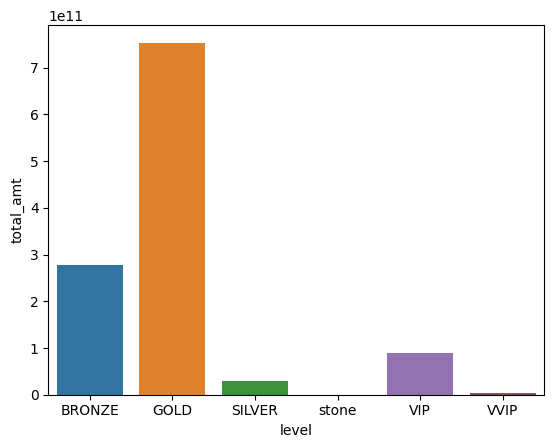

In [ ]:
# 바차트
sns.barplot(data = df, x = 'level', y = 'total_amt')

<Axes: xlabel='level', ylabel='total_member'>

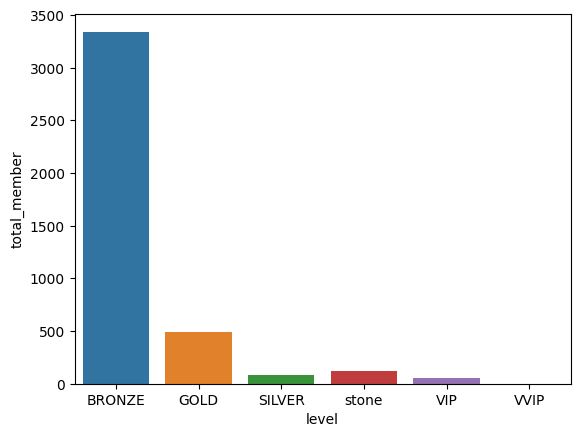

In [ ]:
sns.barplot(data = df, x = 'level', y = 'total_member')

## 구매 전환율 및 구매 주기 분석

- 구매 패턴 분석/파악을 위한 전략
- 최초 구매일, 최근 구매일, 구매회수 => 구매 주기 계산

In [ ]:
cur_sql = '''
    -- 2020년도에 구매 기록이 존재, 2021년도에 구매 기록이 있다면 Y
    -- 없으면 N
    -- view buy_record_base
    -- 칼럼
        -- 파생 : yn
        -- 2020 회원번호, 2021 회원번호
create view buy_record_base as
SELECT A.mem_no AS ori_2020_mem_no, B.mem_no AS ori_2021_mem_no,
case when B.mem_no IS not NULL then 'Y' ELSE 'N' END AS yn
FROM
(SELECT distinct(mem_no)
FROM car_mart
WHERE YEAR(order_date) = 2020) AS A
LEFT JOIN
# 2021년 구매자 회원 번호
(SELECT distinct(mem_no)
FROM car_mart
WHERE YEAR(order_date) = 2021) AS B
on A.mem_no = B.mem_no;
'''
exec_sql(cur_sql)

(1050, "Table 'buy_record_base' already exists")


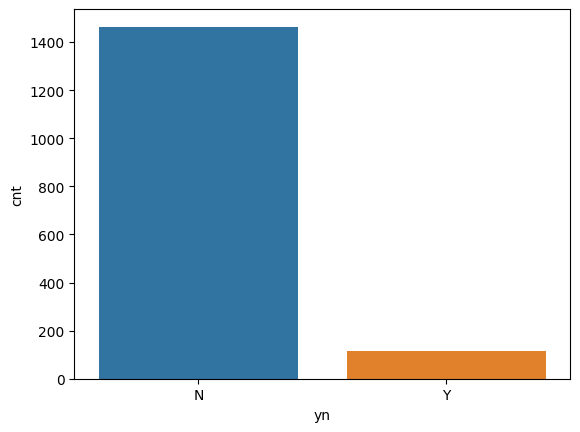

In [ ]:
# 연속 구매한 자, 아닌자의 count 비교
cur_sql = '''
select yn, count(*) as cnt
from buy_record_base
group by yn
'''

df = get_sql(cur_sql)
sns.barplot(data = df, x = 'yn', y = 'cnt')
plt.show()

In [ ]:
# 구매 전환율 계산
# 2020 ~ 2021년까지 연속 구매한자의 수/전체 구매자 수 => 이 수치를 늘리는 방향으로 마케팅이 전개된다(전략)
# 연속 구매한 자, 아닌자의 count 비교
cur_sql = '''
    SELECT
        COUNT(CASE WHEN yn='y' then ori_2020_mem_no END)
        /COUNT( ori_2020_mem_no) * 100 AS rate
    FROM buy_record_base;
'''
df = get_sql( cur_sql )
df

,rate
0,7.4004


#### 구매주기
- 매장별 구매주기
    - 매장(store_cd)별로 제품이 구매되는 주기를 계산
    - 2020 ~ 2021 까지 A라는 매장이 4번 판매되었다. (구매 행위가 있었다)
        - 구매 주기는 a - b - c - d => 구매횟수 -1 (분모)
        - **(최근 구매일 - 최초 구매일) / 구매주기 **
            - 일수 계산 DATEDIFF(max, min) / 구매주기
        - (구매주기값1 + 구매주기값2 + ...)/구매주기

In [ ]:
# 뷰를 생성해서 위의 계산을 위한 데이터 준비
# 뷰명 : buy_cycle_base
# 칼럼 : store_cd, ( 최초구매일, 최근구매일, 주문번호(중복 없이) 개수 ) <= 매장별
# 조건 : 매장별 주문 건수가 n개 이상인 매장만 대상으로 집계한다
cur_sql = '''
    create view buy_cycle_base as
    SELECT  store_cd
            ,MIN(order_date) as min_order_date
            ,MAX(order_date) as max_order_date
            ,COUNT(DISTINCT order_no) as total_count
    FROM car_mart
    GROUP BY store_cd
    HAVING total_count >= 2
'''
exec_sql( cur_sql )

(1050, "Table 'buy_cycle_base' already exists")


In [ ]:
df = get_sql('select * from buy_cycle_base')
display(df)

,store_cd,min_order_date,max_order_date,total_cycle
0,2001,2020-01-14,2021-12-28,190
1,2002,2020-03-01,2021-12-30,199
2,2003,2020-01-11,2021-12-30,139
3,2004,2020-02-13,2021-12-28,66
4,2005,2020-02-18,2021-12-30,99
5,2006,2020-01-30,2021-12-30,153
6,2007,2020-03-06,2021-12-24,168
7,2008,2020-01-28,2021-12-24,208
8,2009,2020-02-11,2021-12-30,167
9,2010,2020-02-20,2021-12-20,239


In [ ]:
# 매장별 구매주기율 계산
cur_sql = '''
SELECT *, DATEDIFF(max_order_date, min_order_date) / total_cycle AS buy_cycle
FROM buy_cycle_base
ORDER BY buy_cycle asc;
'''
df = get_sql(cur_sql)
display(df)

,store_cd,min_order_date,max_order_date,total_cycle,buy_cycle
0,2011,2020-01-27,2021-12-30,663,1.0603
1,2012,2020-02-16,2021-12-30,641,1.0655
2,2015,2020-02-10,2021-12-28,615,1.1171
3,2013,2020-01-16,2021-12-30,382,1.8691
4,2010,2020-02-20,2021-12-20,239,2.7992
5,2008,2020-01-28,2021-12-24,208,3.3462
6,2002,2020-03-01,2021-12-30,199,3.3618
7,2001,2020-01-14,2021-12-28,190,3.7579
8,2007,2020-03-06,2021-12-24,168,3.9167
9,2009,2020-02-11,2021-12-30,167,4.1198


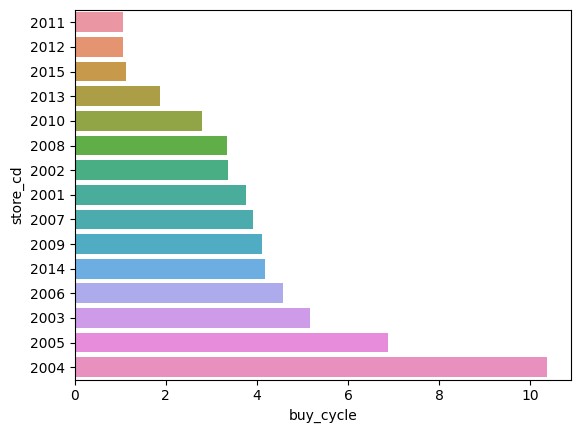

In [ ]:
# 매장간 2년간의 실적을 비교
sns.set_color_codes('pastel')
sns.barplot(data = df, x = 'buy_cycle', y = 'store_cd', orient = 'h' ,order = df['store_cd'])
plt.show()

## 제품의 성장률 분석

- 브랜드, 모델, 년도별 판매액, 판매대수

In [ ]:
cur_sql = '''
CREATE VIEW product_growth_base AS
SELECT brand, model,
SUM(case when YEAR(order_date) = 2020 then sales_amt end) AS total_amt_2020,
SUM(case when YEAR(order_date) = 2021 then sales_amt end) AS total_amt_2021
FROM car_mart
GROUP BY brand, model;
'''
exec_sql(cur_sql)
df = get_sql('select * from product_growth_base')
display(df)

,brand,model,total_amt_2020,total_amt_2021
0,benz,canter 10.4 r,1.920800e+09,3.018400e+09
1,benz,canter 10.4 rl,9.968000e+08,2.180500e+09
2,benz,canter 4.99,9.785000e+08,2.060000e+09
3,benz,canter 6.5,1.814400e+09,2.778300e+09
4,bmw,bmw x4,6.727600e+08,9.632700e+08
5,bmw,mini convertible,4.013100e+08,6.379800e+08
6,chevrolet,bluesky 120s,5.192950e+10,9.644050e+10
7,chevrolet,carden 79ct,6.081600e+09,8.470800e+09
8,chevrolet,carden 79s,4.608400e+10,7.306000e+10
9,chevrolet,fuso rosa business 29,9.858000e+09,1.367400e+10


In [ ]:
# 브랜드별 성장률, 판매대수, 판매금액
cur_sql = '''
select brand, sum(total_amt_2021)/sum(total_amt_2020) as growth
,sum(total_amt_2021)/sum(total_amt_2020) -1 as growth_per
from product_growth_base
group by brand
order by 2 desc;
'''
df = get_sql(cur_sql)
display(df)

,brand,growth,growth_per
0,forton,1.8858,0.8858
1,benz,1.7577,0.7577
2,chevrolet,1.7160,0.7160
3,peugeot,1.6794,0.6794
4,honda,1.5535,0.5535
5,bmw,1.4908,0.4908
6,mazda,1.4601,0.4601


In [ ]:
# 브랜드와 모델을 그룹으로 집계한다
# 칼럼 : 브랜드, 모델, 성장률, 랭킹(ROW_NUMBER() OVER())까지
# partition by => n분위수, 랭킹 등 함수와 같이 종종 사용된다.
cur_sql = '''
SELECT A.*, ROW_NUMBER() OVER(partition BY brand ORDER BY growth_per desc ) AS RANK
FROM (select brand, model, sum(total_amt_2021)/sum(total_amt_2020) -1 as growth_per
from product_growth_base
group by brand, model
ORDER BY brand, growth_per) AS A ;
'''
df = get_sql(cur_sql)
df

,brand,model,growth_per,RANK
0,benz,canter 10.4 rl,1.1875,1
1,benz,canter 4.99,1.1053,2
2,benz,canter 10.4 r,0.5714,3
3,benz,canter 6.5,0.5313,4
4,bmw,mini convertible,0.5897,1
5,bmw,bmw x4,0.4318,2
6,chevrolet,mobihome luxury,1.1000,1
7,chevrolet,mobihome deluxe,0.9310,2
8,chevrolet,bluesky 120s,0.8571,3
9,chevrolet,fuso rosa exclusive 22,0.6667,4
